# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

1.Sumber Dataset 


    Dataset Ini adalah kumpulan data transaksional yang berisi semua transaksi yang terjadi antara 01/12/2010 dan 09/12/2011 untuk ritel daring non-toko yang terdaftar dan berbasis di Inggris. Perusahaan ini terutama menjual hadiah unik untuk segala acara. Banyak pelanggan perusahaan ini adalah pedagang grosir.

    Berikut link dataset : https://archive.ics.uci.edu/dataset/352/online+retail



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from tabulate import tabulate

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("Online-Retail.csv")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [98]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [99]:
# Jumlah  Data hilang
data_hilang = df.isnull().sum()
print("jumlah data hilang : \n", data_hilang)

jumlah data hilang : 
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [100]:
#data duplikat
data_duplicated = df.duplicated().sum()
print(f"Jumlah data duplikat: {data_duplicated}")

Jumlah data duplikat: 5268


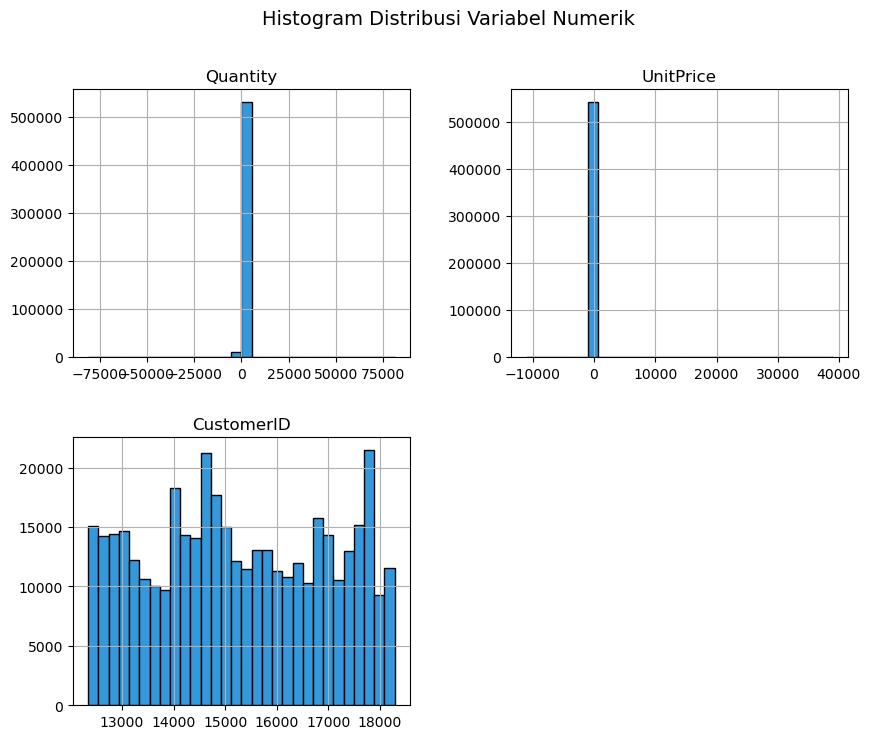

In [49]:
# Histogram untuk variabel numerik
df.hist(figsize=(10, 8), bins=30, color="#3498db", edgecolor="black")
plt.suptitle("Histogram Distribusi Variabel Numerik", fontsize=14)
plt.show()


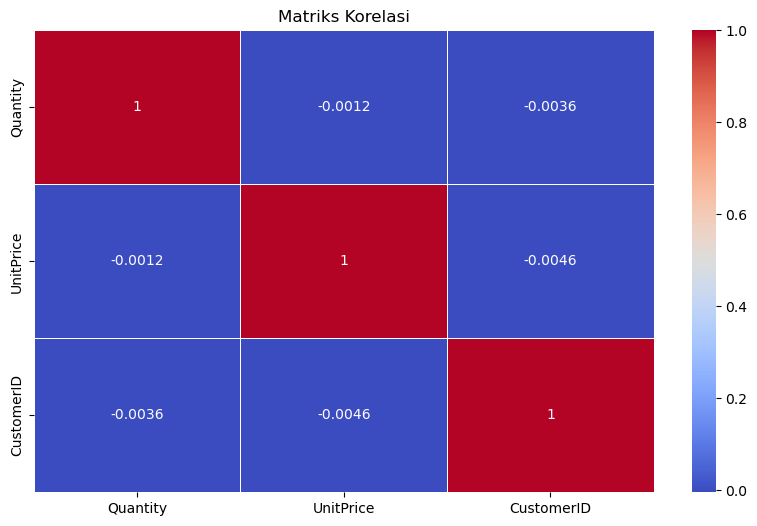

In [50]:
## Korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

/var/folders/qf/s7f_42996nn6gysrn5cyjq600000gn/T/ipykernel_1860/2318159848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")  # Ambil top 10 kategori


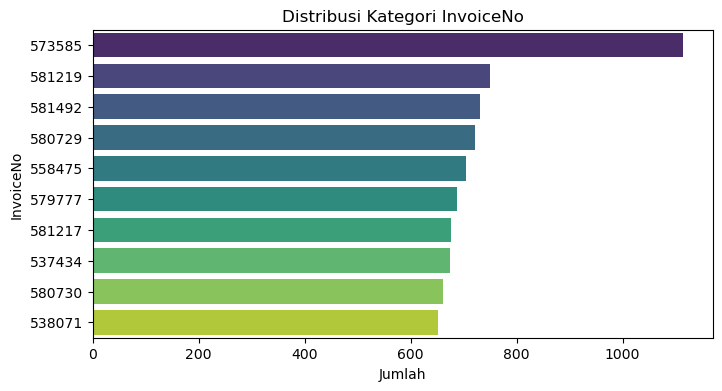

/var/folders/qf/s7f_42996nn6gysrn5cyjq600000gn/T/ipykernel_1860/2318159848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")  # Ambil top 10 kategori


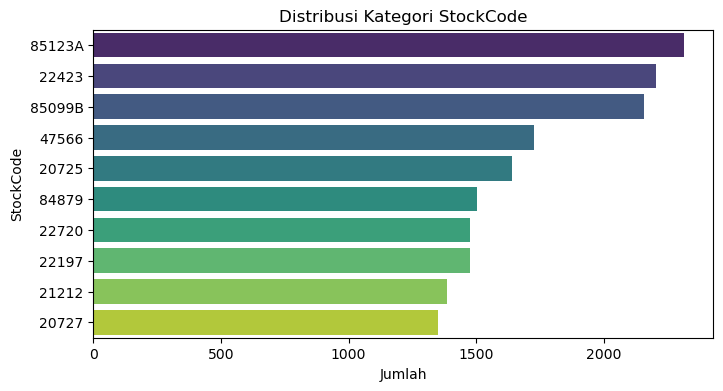

/var/folders/qf/s7f_42996nn6gysrn5cyjq600000gn/T/ipykernel_1860/2318159848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")  # Ambil top 10 kategori


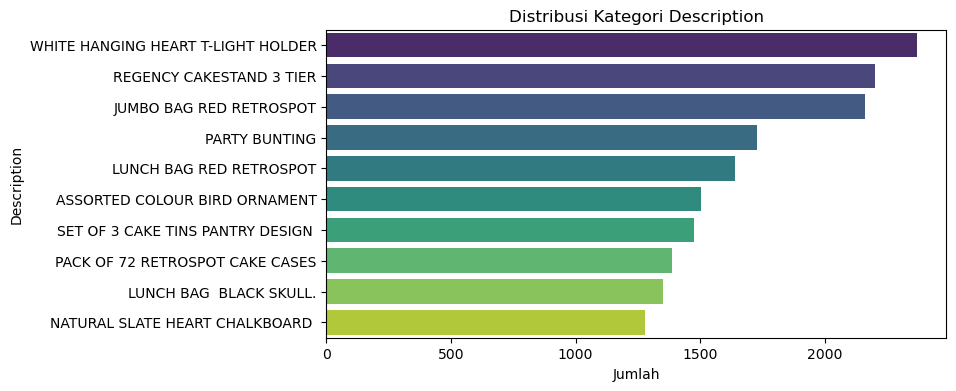

/var/folders/qf/s7f_42996nn6gysrn5cyjq600000gn/T/ipykernel_1860/2318159848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")  # Ambil top 10 kategori


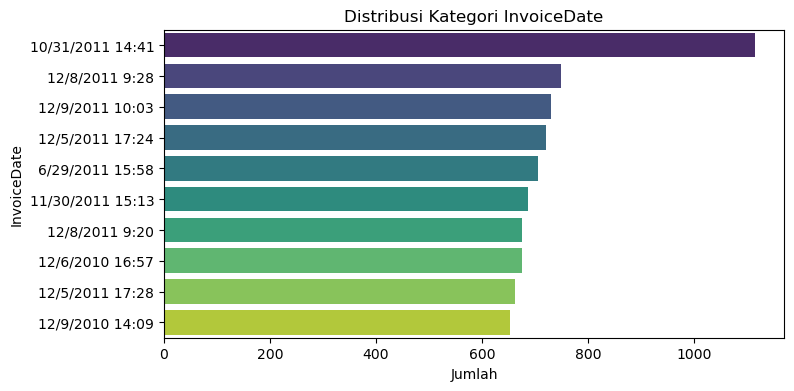

/var/folders/qf/s7f_42996nn6gysrn5cyjq600000gn/T/ipykernel_1860/2318159848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")  # Ambil top 10 kategori


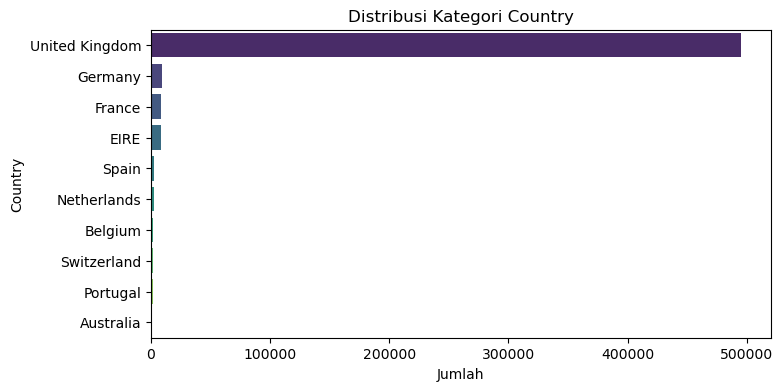

In [51]:
# visulalisasi data kategorikal 
categorical_cols = df.select_dtypes(include=["object"]).columns

if not categorical_cols.empty:
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")  # Ambil top 10 kategori
        plt.title(f"Distribusi Kategori {col}")
        plt.xlabel("Jumlah")
        plt.ylabel(col)
        plt.show()
else:
    print("Tidak ada kolom kategorikal untuk divisualisasikan.")


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [3]:
df.drop(columns=["Description","Country","InvoiceDate","CustomerID","InvoiceNo","StockCode"],inplace=True)
df

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [4]:
#  Drop
numerical_cols = df.select_dtypes(include=["number"]).columns
df = df.dropna(subset=numerical_cols,)


In [5]:
# Hapus data duplikat
df = df.drop_duplicates()

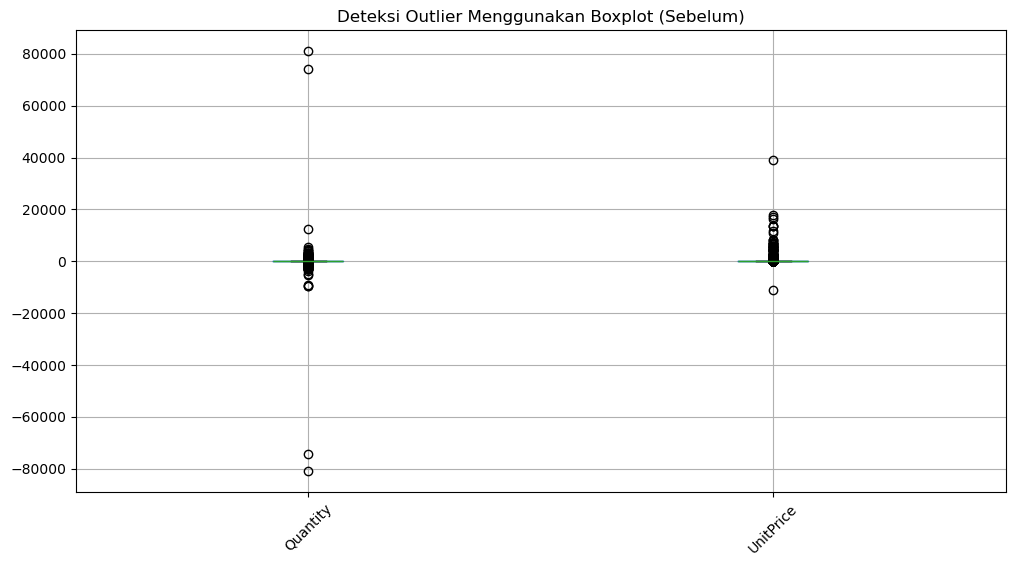

In [6]:

# **Visualisasi Boxplot Sebelum Membersihkan Outlier**
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=45)  
plt.title("Deteksi Outlier Menggunakan Boxplot (Sebelum)")
plt.show()


In [9]:
# **Hapus Outlier Langsung Dari df
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hapus outlier langsung dari df
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# **Jumlah Data Setelah Pembersihan**
print(f"Jumlah data setelah membersihkan outlier: {df.shape[0]}")

Jumlah data setelah membersihkan outlier: 4967


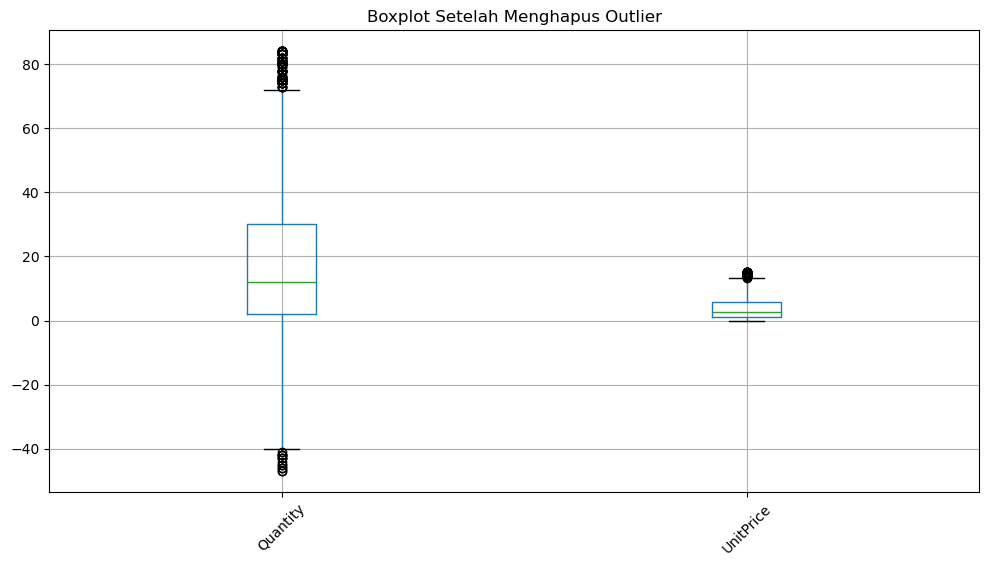

In [10]:
# **Visualisasi Boxplot Setelah Menghapus Outlier**
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=45)
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()

In [11]:
## Normalisasi data dengan StandardScaler
scaler = StandardScaler() # StandardScaler
scaler.fit(df[numerical_cols])

# Transformasi data dengan scaler
X_scaled = scaler.transform(df[numerical_cols])


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [12]:
## Membangun Model nya dengan K-Means Clustering
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init="auto")
df["Cluster"] = kmeans.fit_predict(X_scaled) 

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

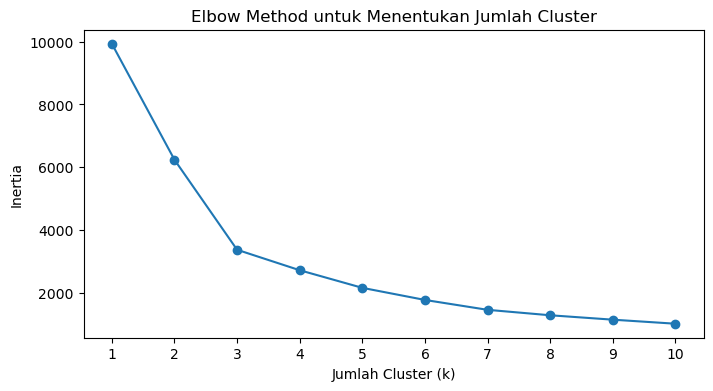

Jumlah cluster optimal berdasarkan Elbow Method: 9


In [13]:
#  Elbow Method
inertia = []
K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot hasilnya
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xticks(K_range)
plt.show()

# Menentukan jumlah cluster optimal (titik elbow)
deltas = np.diff(inertia)  # Selisih antar inertia
elbow_point = np.argmin(np.abs(deltas)) + 1  # Cari titik perubahan terbesar

print(f"Jumlah cluster optimal berdasarkan Elbow Method: {elbow_point}")

In [14]:

# **Tentukan jumlah cluster tetap (k = 3)**
n_clusters = 3

# **Inisialisasi dan jalankan MiniBatchKMeans**
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, n_init=10, batch_size=500)
cluster_labels = kmeans.fit_predict(X_scaled)

# **Gunakan sampling agar perhitungan lebih cepat**
sample_size = min(1000, len(X_scaled))
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)

# **Hitung Silhouette Score**
silhouette_score_value = silhouette_score(X_scaled[sample_indices], cluster_labels[sample_indices])

# **Cetak nilai Silhouette Score**
print(f"Silhouette Score untuk {n_clusters} cluster: {silhouette_score_value:.4f}")

Silhouette Score untuk 3 cluster: 0.4517


In [15]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

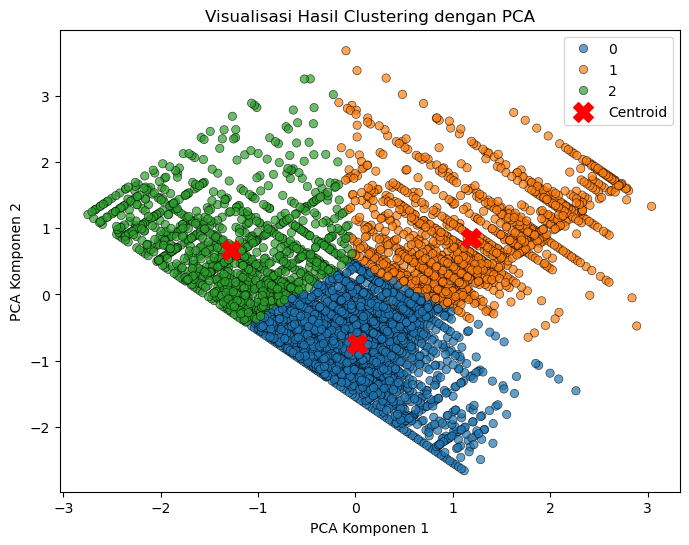

In [16]:
# **Lakukan PCA untuk mereduksi dimensi ke 2D**
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Gunakan data yang sudah distandardisasi

# **Tambahkan hasil PCA ke DataFrame**
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# **Scatter plot dengan warna per cluster**
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["PCA1"], 
    y=df["PCA2"], 
    hue=df["Cluster"], 
    palette="tab10",  # Gunakan palet warna yang lebih berbeda
    alpha=0.7, 
    edgecolor="black"
)

# **Tambahkan centroid cluster dalam ruang PCA**
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1], 
    c="red", marker="X", s=200, label="Centroid"
)

plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

Cluster
0    2513
1    1262
2    1192
Name: count, dtype: int64


/var/folders/qf/s7f_42996nn6gysrn5cyjq600000gn/T/ipykernel_9800/3754111104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Cluster", palette="viridis")


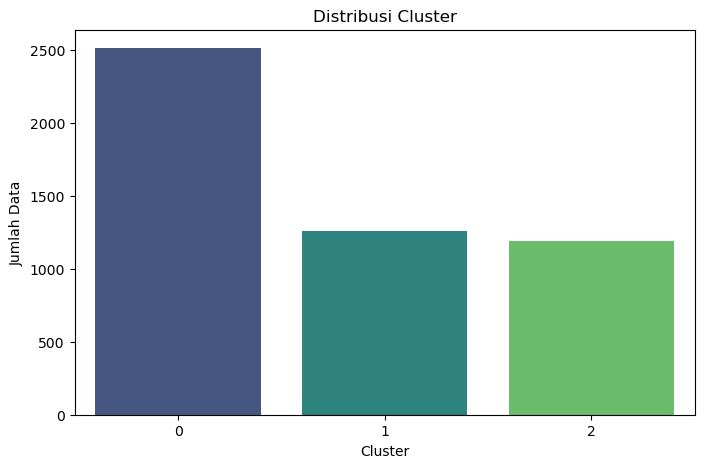

In [18]:

#  **Lihat distribusi setiap cluster**
print(df["Cluster"].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Cluster", palette="viridis")
plt.title("Distribusi Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")

plt.show()


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [28]:

# Kembalikan fitur numerik ke skala aslinya
df[["Quantity", "UnitPrice"]] = scaler.inverse_transform(df[["Quantity", "UnitPrice"]])


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 0 
:

- Cluster dengan jumlah data terbanyak mencerminkan pola pembelian yang paling umum.


- Cluster dengan Quantity tinggi dan Unit Price rendah cocok untuk strategi diskon besar.
- Cluster dengan Quantity rendah tapi harga tinggi cocok untuk produk eksklusif atau premium.
- Distribusi pelanggan berdasarkan negara bisa digunakan untuk strategi pemasaran spesifik per wilayah.


SCRIPT UTK MENGETHUI KARAKTERISTIK CLUSTER

In [29]:
# Hitung jumlah data per cluster
cluster_counts = df["Cluster"].value_counts()

# Hitung statistik per cluster
cluster_summary = df.groupby("Cluster").agg({
    "Quantity": "mean",
    "UnitPrice": "mean",
}).rename(columns={"Quantity": "Rata-rata Quantity", "UnitPrice": "Rata-rata Unit Price"})

# Gabungkan hasil
cluster_analysis = pd.DataFrame({
    "Jumlah Data": cluster_counts,
}).merge(cluster_summary, left_index=True, right_index=True)

# Tampilkan hasil
print(cluster_analysis)

         Jumlah Data  Rata-rata Quantity  Rata-rata Unit Price
Cluster                                                       
0               2513        1.632973e+06            579.511847
1               1262        3.964493e+06           1724.139952
2               1192        1.681647e+07            636.561663


# **Analisis Karakteristik Cluster dari Model KMeans**

## **Cluster 0**  
- **Jumlah Data**: 2,513  
- **Rata-rata Quantity**: 1,632,973  
- **Rata-rata Unit Price**: 579.51  

### **Interpretasi**  
Cluster ini memiliki **jumlah transaksi terbesar**, tetapi jumlah pembelian per transaksi relatif lebih kecil dibandingkan Cluster 1 dan 2.  
Harga satuannya **sedang**, menunjukkan bahwa pelanggan dalam cluster ini kemungkinan adalah **pembeli reguler atau bisnis kecil-menengah** yang melakukan pembelian dalam jumlah standar.  
Kelompok ini mungkin terdiri dari perusahaan atau individu yang rutin melakukan transaksi tetapi tidak dalam skala besar.  

---

## **Cluster 1**  
- **Jumlah Data**: 1,262  
- **Rata-rata Quantity**: 3,964,493  
- **Rata-rata Unit Price**: 1,724.14  

### **Interpretasi**  
Cluster ini memiliki **harga satuan tertinggi**, menunjukkan bahwa pelanggan dalam kelompok ini lebih memilih **produk premium atau eksklusif** dengan harga yang jauh lebih mahal dibandingkan dua cluster lainnya.  
Jumlah pembelian mereka juga cukup besar, tetapi tidak sebesar Cluster 2.  
Kelompok ini kemungkinan terdiri dari **perusahaan atau pelanggan dengan daya beli tinggi**, yang lebih fokus pada kualitas produk dibandingkan kuantitas.  

---

## **Cluster 2**  
- **Jumlah Data**: 1,192  
- **Rata-rata Quantity**: 16,816,470  
- **Rata-rata Unit Price**: 636.56  

### **Interpretasi**  
Cluster ini memiliki **jumlah pembelian tertinggi**, jauh lebih besar dibandingkan dua cluster lainnya.  
Pelanggan dalam cluster ini kemungkinan besar adalah **pedagang besar atau distributor** yang membeli dalam jumlah sangat besar untuk keperluan bisnis atau penjualan kembali.  
Meskipun harga satuannya **tidak setinggi Cluster 1**, pelanggan dalam kelompok ini lebih mengutamakan **volume pembelian besar untuk mendapatkan harga yang lebih ekonomis**.  


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [30]:
df = df.drop(columns=["PCA1","PCA2"])

df.to_csv("dataset_klasifikasi.csv", index=False)
print("✅ Data hasil inverse transform telah disimpan sebagai dataset_klasifikasi.csv!")

✅ Data hasil inverse transform telah disimpan sebagai dataset_klasifikasi.csv!
